# Importing the **libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('Instagram data.csv', encoding = 'latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# **Checking** is there any null values or not

In [3]:
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


# Drop null value from every **column**

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Account **Analysis**

# Reach from Home

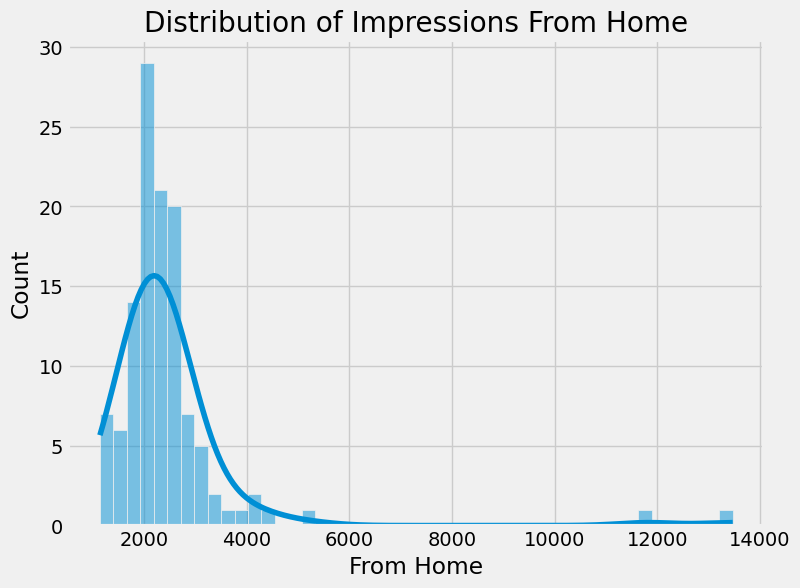

In [19]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions From Home')
sns.histplot(data['From Home'], kde=True)
plt.show()

# Reach from Hashtags

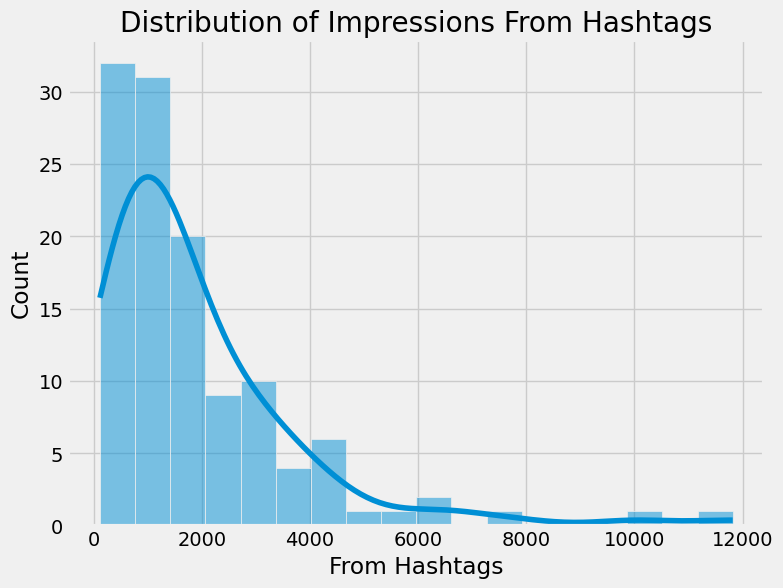

In [18]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Impressions From Hashtags')
sns.histplot(data['From Hashtags'], kde=True)
plt.show()

# From Explore

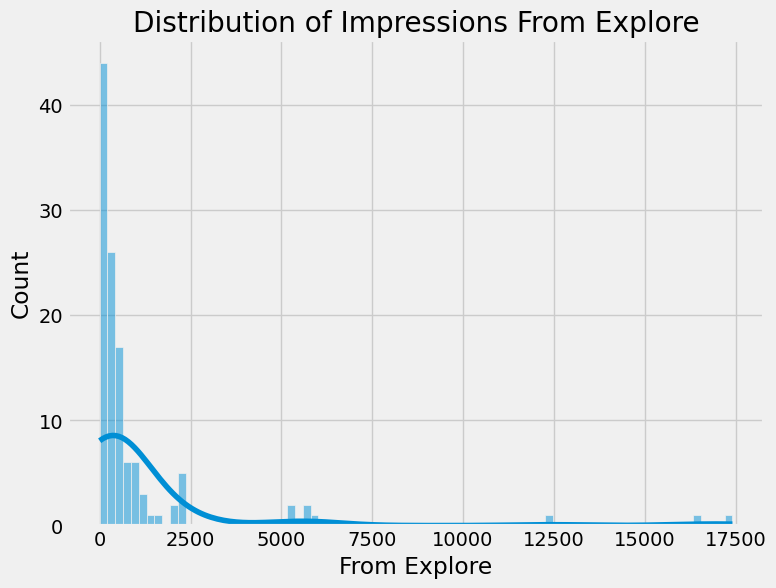

In [17]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Impressions From Explore')
sns.histplot(data['From Explore'], kde=True)
plt.show()

# Now let's have a look on the total percentage from different **section**

In [20]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

fig = px.pie(data,
             values = values,
             names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

# Analyzing **Content**

# creating wordcloud to analyze type of content by the help of captions and hashtags

# For captions

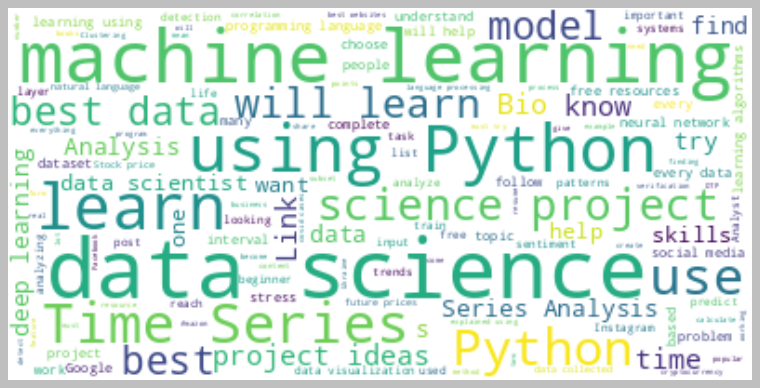

In [24]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# For Hashtags

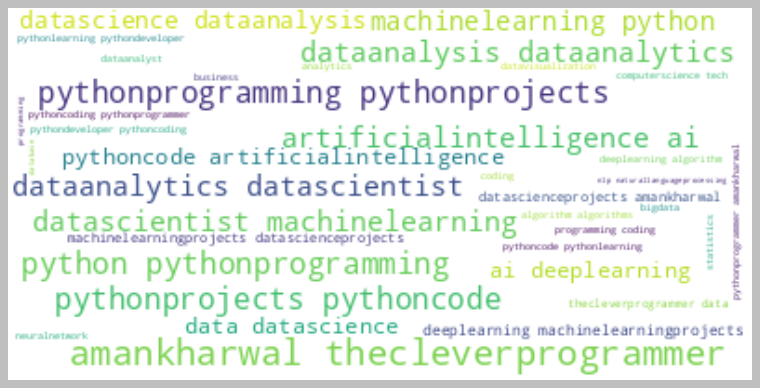

In [28]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(12, 10))
plt.style.use('classic')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing **Relationship**

In [29]:
figure = px.scatter(data_frame=data,
                    x = 'Impressions',
                    y = 'Likes',
                    size = 'Likes',
                    trendline='ols',
                    title = 'Relationship between Likes and Impressions')
figure.show()

In [30]:
figure = px.scatter(data_frame=data,
                    x = 'Impressions',
                    y = 'Comments',
                    size = 'Comments',
                    trendline='ols',
                    title = 'Relationship between Comments and Impressions')
figure.show()

In [31]:
figure = px.scatter(data_frame=data,
                    x = 'Impressions',
                    y = 'Shares',
                    size = 'Shares',
                    trendline='ols',
                    title = 'Relationship between Shares and Impressions')
figure.show()

In [33]:
figure = px.scatter(data_frame=data,
                    x = 'Impressions',
                    y = 'Saves',
                    size = 'Saves',
                    trendline='ols',
                    title = 'Relationship between Post Saves and Impressions')
figure.show()

# checking correlation with columns

In [44]:
numeric_data = data.select_dtypes(include=[np.number])

In [46]:
numeric_data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,9,5,162,35,2
1,5394,2727,1838,1174,78,194,7,14,224,48,10
2,4021,2085,1188,0,533,41,11,1,131,62,12
3,4528,2700,621,932,73,172,10,7,213,23,8
4,2518,1704,255,279,37,96,5,4,123,8,0
...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80
115,5731,1923,1368,2266,65,135,4,1,148,20,18
116,4139,1133,1538,1367,33,36,0,1,92,34,10
117,32695,11815,3147,17414,170,1095,2,75,549,148,214


In [47]:
correlation = numeric_data.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


# Analyzing Conversion Rate

In [41]:
conversion_rate = (data['Follows'].sum()/data['Profile Visits'].sum())*100
print(conversion_rate)

41.00265604249668


In [42]:
fig = px.scatter(data_frame = data,
                 x = 'Profile Visits',
                 y = 'Follows',
                 size='Follows',
                 trendline='ols',
                 title='Relationship between Profile Visits and Followers Gained')
fig.show()

# Prediction **Models**

In [48]:
x = data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
y = data['Impressions']

# Splitting the data into test case and train **case**

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import PassiveAggressiveRegressor
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8888289129999767

# let's predict by inputting **values**

In [51]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but PassiveAggressiveRegressor was fitted with feature names



array([11090.55845184])

So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python. If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in.